# Imports

In [13]:
import pandas as pd
import numpy as np
import os,  sys
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.colors as colors

from mpl_toolkits import mplot3d

sys.path.append('/Users/benjaminwong/JupyterNotebooks/masters_pfti/notebooks/python/')

from hetanalysis import HetAnalysis
import plotter
from clean import BlockModelCleaner

output_dir = "../outputs/het_analysis_block_model/"
SAVE = True

plt.rcParams.update(
    {
        'font.size': 22
    }
)

%matplotlib widget

# Data Input and Cleaning

In [14]:
df = BlockModelCleaner.get_processed_data()
filtered_df = df.query('CU > 0.001')

In [15]:
df

,centroid_x,centroid_y,centroid_z,dim_x,dim_y,dim_z,volume,strat,alteration,ug_fault,...,form5,form6,form7,structure,AG,AU,CU,pload_all,rqd,sg
block_id,,,,,,,,,,,,,,,,,,,,,
0,735929.7992,9549147.685,2197.5,15,15,15,3375,1,0,0,...,1,1,1,0,0.001,0.001,0.0001,-9.0,-9.0,2.649738
1,735941.6194,9549138.450,2197.5,15,15,15,3375,1,0,0,...,1,1,1,0,0.001,0.001,0.0001,-9.0,-9.0,2.649738
2,735953.4395,9549129.215,2197.5,15,15,15,3375,1,0,0,...,1,1,1,0,0.001,0.001,0.0001,-9.0,-9.0,2.649738
3,735965.2597,9549119.980,2197.5,15,15,15,3375,1,0,0,...,1,1,1,0,0.001,0.001,0.0001,-9.0,-9.0,2.649738
4,735977.0799,9549110.745,2197.5,15,15,15,3375,1,0,0,...,1,1,1,0,0.001,0.001,0.0001,-9.0,-9.0,2.649738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973271,738703.5131,9548750.903,3112.5,15,15,15,3375,8,0,0,...,4,2,2,0,0.001,0.001,0.0001,-9.0,-9.0,2.585076
973272,738715.3333,9548741.668,3112.5,15,15,15,3375,8,0,0,...,4,2,2,0,0.001,0.001,0.0001,-9.0,-9.0,2.585076
973273,738727.1534,9548732.433,3112.5,15,15,15,3375,8,0,0,...,4,2,2,0,0.001,0.001,0.0001,-9.0,-9.0,2.585076


# Grouping

In [16]:
elements = [
    'CU',
    'AG',
    'AU'
]

combined = {}

for element in elements:
    try:
        combined[element] = HetAnalysis(
            f'BM_{element}', 
            df['sg'], 
            df[element]
        ) # can multiply sg by volume if volumes are different
    except:
        print(f'Invalid data for BM_{element}')

In [17]:
filtered = {}

for element in elements:
    try:
        filtered[element] = HetAnalysis(
            f'BM_{element}', 
            filtered_df['sg'], 
            filtered_df[element]
        )
    except:
        print(f'Invalid data for BM_{element}')

# Visualize

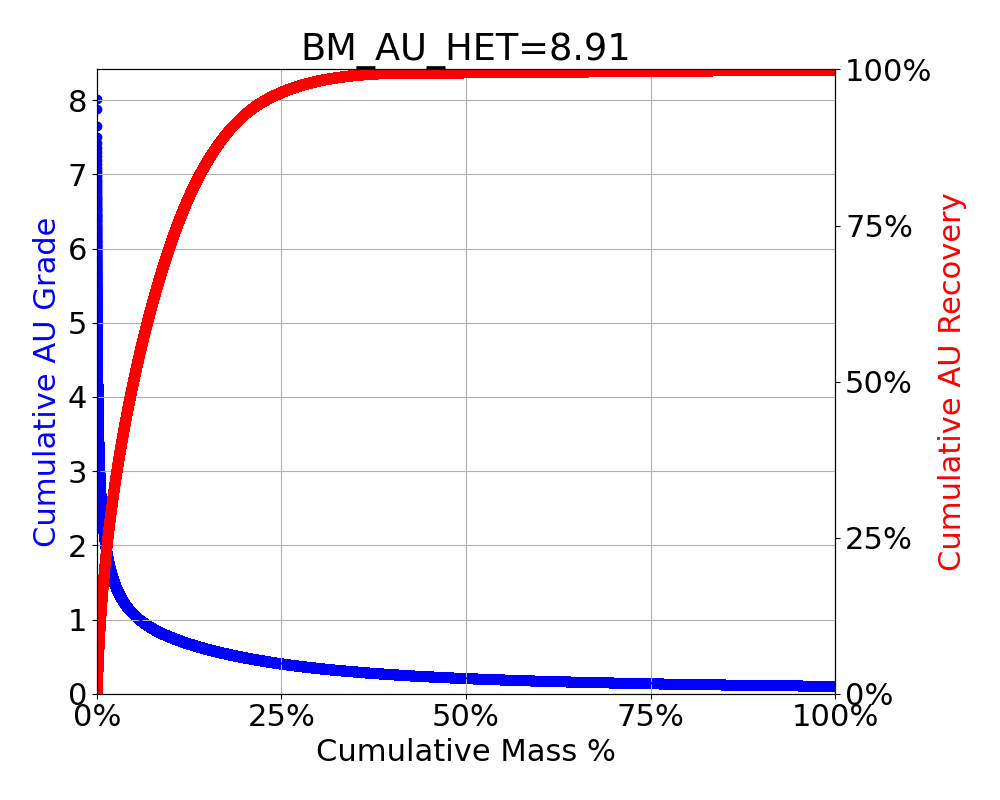

In [18]:
# if SAVE:
#     fig = plt.figure()
#     fig.set_size_inches(10, 8)

#     for element in elements:
#         fig.clear()
#         ax = fig.add_subplot()

#         het = combined[element].get_heterogeneity()
#         info = combined[element].get_info()
            
#         if len(info) > 0:
#             ax.set_title(f'BM_{element}_HET={het:.2f}')
#             plotter.plot_grade_recovery_curve(ax, info, element)

#             save_loc = output_dir + f'combined/'
#             if not os.path.exists(save_loc):
#                 os.makedirs(save_loc)
                
#             fig.tight_layout()
#             fig.savefig(save_loc + f'BM_{element}.png', format='png', dpi=200)
            
if SAVE:
    fig = plt.figure()
    fig.set_size_inches(10, 8)

    for element in elements:
        fig.clear()
        ax = fig.add_subplot()
        
        het = combined[element].get_heterogeneity()
        info = combined[element].get_info()
            
        if len(info) > 0:
            ax.set_title(f'BM_{element}_HET={het:.2f}')
            
            ax_sec = ax.twinx()
            
            plotter.plot_g_r(ax, ax_sec, info)
            plotter.scatter_g_r(ax, ax_sec, info)
            
            plotter.set_g_r_labels(ax, ax_sec, element)
            ax.grid()
            
            save_loc = output_dir + f'combined/'
            if not os.path.exists(save_loc):
                os.makedirs(save_loc)
                
            fig.tight_layout()
            fig.savefig(save_loc + f'BM_{element}.png', format='png', dpi=200)

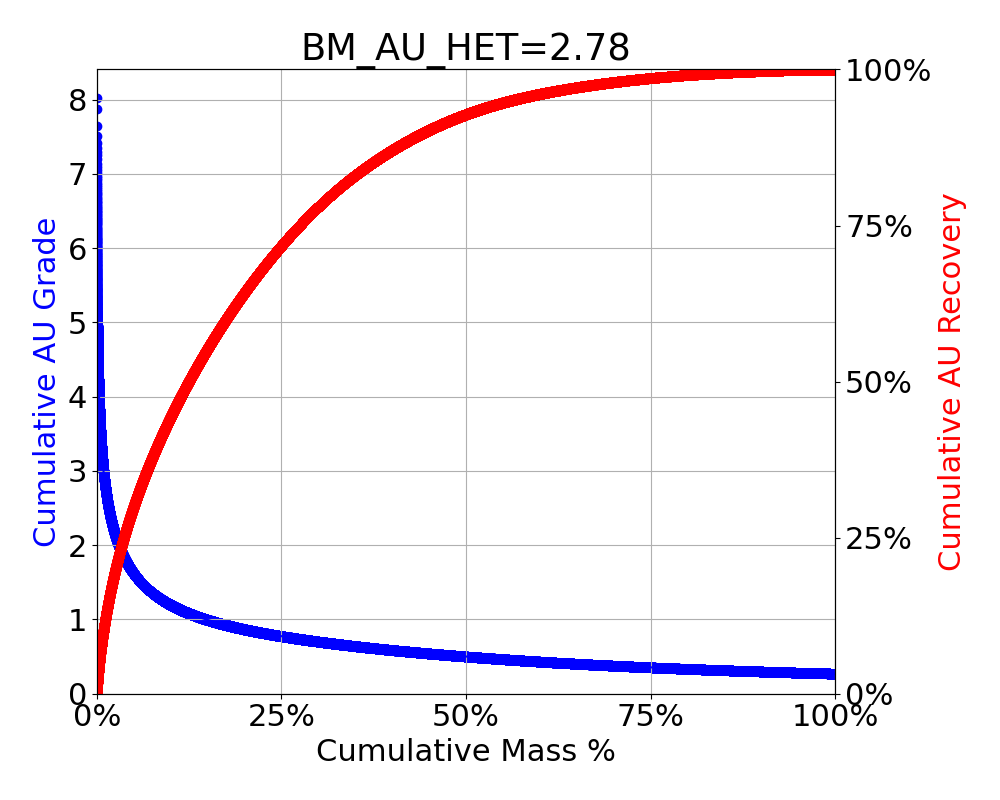

In [19]:
if SAVE:
    fig = plt.figure()
    fig.set_size_inches(10, 8)

    for element in elements:
        fig.clear()
        ax = fig.add_subplot()

        het = filtered[element].get_heterogeneity()
        info = filtered[element].get_info()
         
        if len(info) > 0:
            ax.set_title(f'BM_{element}_HET={het:.2f}')
            
            ax_sec = ax.twinx()
            
            plotter.plot_g_r(ax, ax_sec, info)
            plotter.scatter_g_r(ax, ax_sec, info)
            
            plotter.set_g_r_labels(ax, ax_sec, element)
            ax.grid()
            
            save_loc = output_dir + f'filtered/'
            if not os.path.exists(save_loc):
                os.makedirs(save_loc)
                
            fig.tight_layout()
            fig.savefig(save_loc + f'BM_{element}.png', format='png', dpi=200)